In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import api_function as ap
import plot_function as pf


In [5]:
def manipulate(df):
    df['ratio'] = 100*(df.close - df.open)/df.open
    df['absolute'] = df.close - df.open
    df.index = pd.to_datetime(df.index)
    df['avg_ratio'] = df.ratio.mean()
    return df

In [212]:
# r_aapl = ap.get_stock_daily('AAPL', 'full', 'csv')
# with open('data/apple-daily.csv', 'wb') as f:
#     f.write(r_aapl.content)

In [134]:
# df_tesla = pd.read_csv('data/tesla-daily.csv')
# df_tesla.head()

,timestamp,open,high,low,close,volume
0,2022-03-21,914.98,942.85,907.0900,921.16,26640958
1,2022-03-18,874.49,907.85,867.3900,905.39,33443159
2,2022-03-17,830.99,875.00,825.7178,871.60,22194324
3,2022-03-16,809.00,842.00,802.2601,840.23,28009607
4,2022-03-15,775.27,805.57,756.5700,801.89,22280381


In [9]:
df_apple = manipulate(ap.get_df_stock_daily('AAPL'))
df_bitcoin = manipulate(ap.get_df_stock_daily('BTCUSD'))
df_tesla = manipulate(ap.get_df_stock_daily('TSLA'))
df_microsoft = manipulate(ap.get_df_stock_daily('MSFT'))
df_google = manipulate(ap.get_df_stock_daily('GOOG'))
df_facebook = manipulate(ap.get_df_stock_daily('FB'))

In [10]:
df_apple = df_apple1

In [15]:
df_bitcoin.to_csv('data/BTC-Daily.csv')
df_apple.to_csv('data/AAPL-Daily.csv')
df_tesla.to_csv('data/TSLA-Daily.csv')
df_microsoft.to_csv('data/MSFT-Daily.csv')
df_google.to_csv('data/GOOG-Daily.csv')
df_facebook.to_csv('data/FB-Daily.csv')


In [214]:
df_stocks_close = pd.concat([df_apple[['timestamp', 'close']].set_index('timestamp'), df_bitcoin[['timestamp', 'close']].set_index('timestamp'), df_tesla[['timestamp', 'close']].set_index('timestamp'), df_microsoft[['timestamp', 'close']].set_index('timestamp'), df_google[['timestamp', 'close']].set_index('timestamp'), df_facebook[['timestamp', 'close']].set_index('timestamp')], axis=1)
df_stocks_close.columns = ['apple', 'bitcoin', 'tesla', 'microsoft', 'google', 'facebook']

In [137]:
df_stocks_ratio = pd.concat([df_apple[['timestamp', 'ratio']].set_index('timestamp'), df_bitcoin[['timestamp', 'ratio']].set_index('timestamp'), df_tesla[['timestamp', 'ratio']].set_index('timestamp'), df_microsoft[['timestamp', 'ratio']].set_index('timestamp'), df_google[['timestamp', 'ratio']].set_index('timestamp'), df_facebook[['timestamp', 'ratio']].set_index('timestamp')], axis=1)
df_stocks_ratio.columns = ['apple', 'bitcoin', 'tesla', 'microsoft', 'google', 'facebook']

In [190]:
df_stocks_close.head()

,apple,bitcoin,tesla,microsoft,google,facebook
timestamp,,,,,,
1999-11-01,77.62,NaN,NaN,92.37,NaN,NaN
1999-11-02,80.25,NaN,NaN,92.56,NaN,NaN
1999-11-03,81.50,NaN,NaN,92.00,NaN,NaN
1999-11-04,83.62,NaN,NaN,91.75,NaN,NaN
1999-11-05,88.31,NaN,NaN,91.56,NaN,NaN


In [216]:
df_apple[df_apple.timestamp.dt.year == 2010][5:]

,timestamp,open,high,low,close,volume,ratio,absolute,avg_ratio
2829,2010-12-23,325.00,325.15,323.17,323.600,7969900,-0.430769,-1.400,0.033803
2830,2010-12-22,324.36,325.72,323.55,325.160,9497200,0.246640,0.800,0.033803
2831,2010-12-21,323.00,324.39,322.05,324.205,9155500,0.373065,1.205,0.033803
2832,2010-12-20,321.60,323.25,318.23,322.210,13771800,0.189677,0.610,0.033803
2833,2010-12-17,321.63,321.79,320.23,320.610,13818900,-0.317135,-1.020,0.033803
...,...,...,...,...,...,...,...,...,...
3071,2010-01-08,210.30,212.00,209.06,211.980,15986100,0.798859,1.680,0.033803
3072,2010-01-07,211.75,212.00,209.05,210.580,17040400,-0.552538,-1.170,0.033803
3073,2010-01-06,214.38,215.23,210.75,210.970,19720000,-1.590633,-3.410,0.033803
3074,2010-01-05,214.60,215.59,213.25,214.380,21496600,-0.102516,-0.220,0.033803


In [206]:
df_stocks_close[df_stocks_close.index.year == 2010][0:10]

,apple,bitcoin,tesla,microsoft,google,facebook
timestamp,,,,,,
2010-01-04,214.01,NaN,NaN,30.950,NaN,NaN
2010-01-05,214.38,NaN,NaN,30.960,NaN,NaN
2010-01-06,210.97,NaN,NaN,30.770,NaN,NaN
2010-01-07,210.58,NaN,NaN,30.452,NaN,NaN
2010-01-08,211.98,NaN,NaN,30.660,NaN,NaN
2010-01-11,210.11,NaN,NaN,30.270,NaN,NaN
2010-01-12,207.72,NaN,NaN,30.070,NaN,NaN
2010-01-13,210.65,NaN,NaN,30.350,NaN,NaN
2010-01-14,209.43,NaN,NaN,30.960,NaN,NaN


In [ ]:
df_stocks_ratio_normed.head()

,timestamp,apple,bitcoin,tesla,microsoft,google,facebook
0,1999-11-01,1.000000,NaN,NaN,1.000000,NaN,NaN
1,1999-11-02,-0.969619,NaN,NaN,0.217073,NaN,NaN
2,1999-11-03,0.049419,NaN,NaN,1.071745,NaN,NaN
3,1999-11-04,-0.639008,NaN,NaN,0.642844,NaN,NaN
4,1999-11-05,-1.465772,NaN,NaN,0.288547,NaN,NaN


In [139]:
df_tesla['ratio'] = 100*(df_tesla.close - df_tesla.open)/df_tesla.open

In [140]:
df_tesla['absolute'] = df_tesla.close - df_tesla.open

In [141]:
df_tesla.timestamp = pd.to_datetime(df_tesla.timestamp)

In [142]:
df_tesla.tail(8)

,timestamp,open,high,low,close,volume,ratio,absolute,avg_ratio
2945,2010-07-09,17.58,17.9000,16.55,17.40,4050600,-1.023891,-0.18,0.039549
2946,2010-07-08,16.14,17.5200,15.57,17.46,7711400,8.178439,1.32,0.039549
2947,2010-07-07,16.40,16.6300,14.98,15.80,6921700,-3.658537,-0.60,0.039549
2948,2010-07-06,20.00,20.0000,15.83,16.11,6866900,-19.450000,-3.89,0.039549
2949,2010-07-02,23.00,23.1000,18.71,19.20,5139800,-16.521739,-3.80,0.039549
2950,2010-07-01,25.00,25.9200,20.27,21.96,8218800,-12.160000,-3.04,0.039549
2951,2010-06-30,25.79,30.4192,23.30,23.83,17187100,-7.599845,-1.96,0.039549
2952,2010-06-29,19.00,25.0000,17.54,23.89,18766300,25.736842,4.89,0.039549


In [143]:
df_tesla2010_2014 = df_tesla[df_tesla['timestamp'].dt.year < 2015]


In [144]:
df_tesla['avg_ratio'] = df_tesla.ratio.mean()

In [145]:
df_tesla.head()

,timestamp,open,high,low,close,volume,ratio,absolute,avg_ratio
0,2022-03-21,914.98,942.85,907.0900,921.16,26640958,0.675425,6.18,0.039549
1,2022-03-18,874.49,907.85,867.3900,905.39,33443159,3.533488,30.90,0.039549
2,2022-03-17,830.99,875.00,825.7178,871.60,22194324,4.886942,40.61,0.039549
3,2022-03-16,809.00,842.00,802.2601,840.23,28009607,3.860321,31.23,0.039549
4,2022-03-15,775.27,805.57,756.5700,801.89,22280381,3.433642,26.62,0.039549


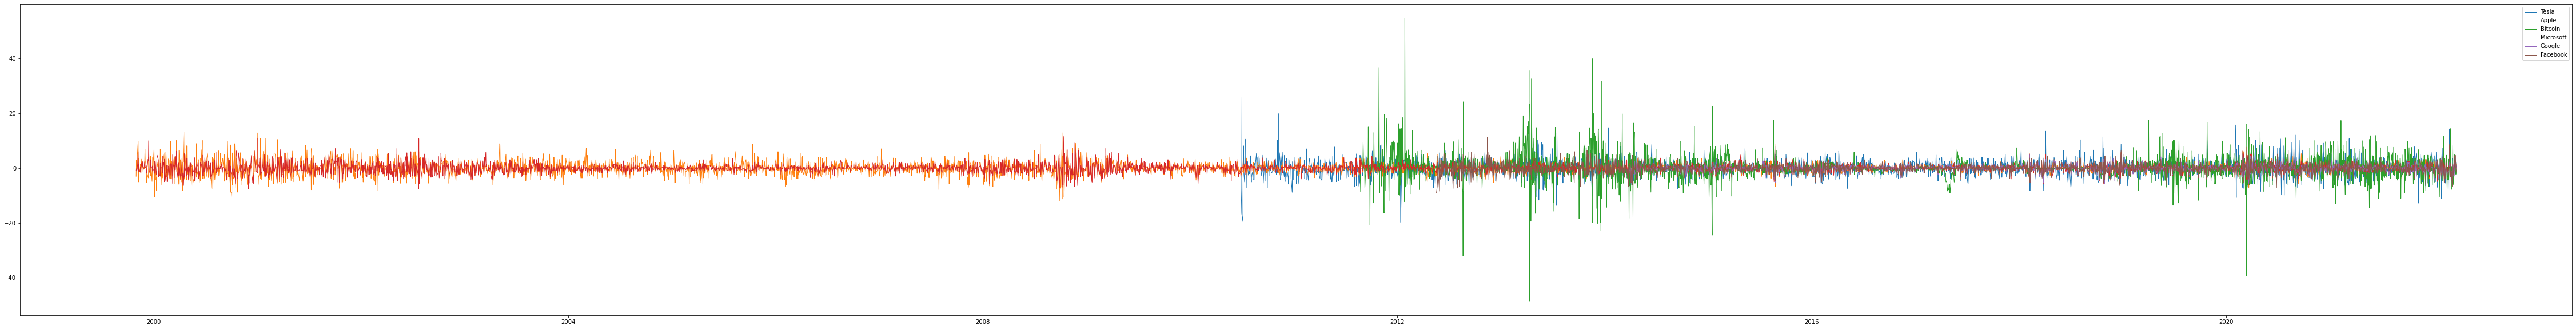

In [146]:
plt.figure(figsize=(80,10))
plt.plot(df_tesla.timestamp, df_tesla.ratio, lw=1)
plt.plot(df_apple.timestamp, df_apple.ratio, lw=1)
plt.plot(df_bitcoin.timestamp, df_bitcoin.ratio, lw=1)
plt.plot(df_microsoft.timestamp, df_microsoft.ratio, lw=1)
plt.plot(df_google.timestamp, df_google.ratio, lw=1)
plt.plot(df_facebook.timestamp, df_facebook.ratio, lw=1)
plt.legend(['Tesla', 'Apple', 'Bitcoin', 'Microsoft', 'Google', 'Facebook'])
plt.show()


In [147]:
df_stocks_ratio

,apple,bitcoin,tesla,microsoft,google,facebook
timestamp,,,,,,
1999-11-01,-2.975000,NaN,NaN,-0.943700,NaN,NaN
1999-11-02,2.884615,NaN,NaN,-0.204852,NaN,NaN
1999-11-03,-0.147023,NaN,NaN,-1.011405,NaN,NaN
1999-11-04,1.901048,NaN,NaN,-0.606652,NaN,NaN
1999-11-05,4.360671,NaN,NaN,-0.272301,NaN,NaN
...,...,...,...,...,...,...
2022-03-17,1.267259,-0.463937,4.886942,0.658052,0.959714,3.044125
2022-03-18,2.161859,2.042873,3.533488,1.713106,2.179125,4.736333
2022-03-19,NaN,1.064548,NaN,NaN,NaN,NaN


In [148]:
df_stocks_ratio['bitcoin'].isna()==False

timestamp
1999-11-01    False
1999-11-02    False
1999-11-03    False
1999-11-04    False
1999-11-05    False
              ...  
2022-03-17     True
2022-03-18     True
2022-03-19     True
2022-03-20     True
2022-03-21     True
Name: bitcoin, Length: 6825, dtype: bool

In [149]:
df_stocks_ratio_normed = df_stocks_ratio.reset_index()
df_stocks_close_normed = df_stocks_close

In [150]:
df_stocks_ratio_normed['microsoft'] = df_stocks_ratio_normed['microsoft']/df_stocks_ratio_normed['microsoft'].iloc[0]
df_stocks_ratio_normed['apple'] = df_stocks_ratio_normed['apple']/df_stocks_ratio_normed['apple'].iloc[0]
df_stocks_ratio_normed['bitcoin'] = df_stocks_ratio_normed['bitcoin']/df_stocks_ratio_normed['bitcoin'][df_stocks_ratio_normed['bitcoin'].first_valid_index()+1]
df_stocks_ratio_normed['tesla'] = df_stocks_ratio_normed['tesla']/df_stocks_ratio_normed['tesla'][df_stocks_ratio_normed['tesla'].first_valid_index()]
df_stocks_ratio_normed['google'] = df_stocks_ratio_normed['google']/df_stocks_ratio_normed['google'][df_stocks_ratio_normed['google'].first_valid_index()]
df_stocks_ratio_normed['facebook'] = df_stocks_ratio_normed['facebook']/df_stocks_ratio_normed['facebook'][df_stocks_ratio_normed['facebook'].first_valid_index()]


In [169]:
df_stocks_ratio_normed.head()

,timestamp,apple,bitcoin,tesla,microsoft,google,facebook
0,1999-11-01,1.000000,NaN,NaN,1.000000,NaN,NaN
1,1999-11-02,-0.969619,NaN,NaN,0.217073,NaN,NaN
2,1999-11-03,0.049419,NaN,NaN,1.071745,NaN,NaN
3,1999-11-04,-0.639008,NaN,NaN,0.642844,NaN,NaN
4,1999-11-05,-1.465772,NaN,NaN,0.288547,NaN,NaN


In [179]:
df_semimonth = df_stocks_ratio_normed.groupby([pd.Grouper(key='timestamp', freq='SM')])[['tesla', 'apple', 'bitcoin', 'microsoft', 'google', 'facebook']].mean().reset_index().sort_values('timestamp')
print(df_semimonth)

     timestamp     tesla     apple   bitcoin  microsoft    google  facebook
0   1999-10-31       NaN -0.460972       NaN  -0.193180       NaN       NaN
1   1999-11-15       NaN -0.159218       NaN  -0.183059       NaN       NaN
2   1999-11-30       NaN  0.186167       NaN  -0.967002       NaN       NaN
3   1999-12-15       NaN -0.045570       NaN  -1.507038       NaN       NaN
4   1999-12-31       NaN  0.510818       NaN  -0.335888       NaN       NaN
..         ...       ...       ...       ...        ...       ...       ...
533 2022-01-15 -0.079250  0.221881  0.555806   0.892383  0.241547  0.083851
534 2022-01-31  0.013839 -0.062249 -0.621933   0.229156  0.457137  0.047178
535 2022-02-15  0.005357 -0.096710  0.641921  -0.432408  0.072156 -0.084370
536 2022-02-28 -0.026429  0.218079 -0.356916   0.636964  0.387740  0.103992
537 2022-03-15  0.127365 -0.602808 -0.367136  -1.422767 -0.765105 -0.255687

[538 rows x 7 columns]


In [11]:
plt.figure(figsize=(80,10))

plt.plot(df_semimonth.timestamp, df_semimonth.apple)
plt.plot(df_semimonth.timestamp, df_semimonth.bitcoin)
plt.plot(df_semimonth.timestamp, df_semimonth.tesla)
plt.plot(df_semimonth.timestamp, df_semimonth.microsoft)
plt.plot(df_semimonth.timestamp, df_semimonth.google)
plt.plot(df_semimonth.timestamp, df_semimonth.facebook)
plt.legend(['Apple','Bitcoin', 'Tesla', 'Microsoft', 'Google', 'Facebook'])
plt.show()

NameError: name 'df_semimonth' is not defined

<Figure size 5760x720 with 0 Axes>

In [151]:
df_stocks_close_normed['microsoft'] = df_stocks_close_normed['microsoft']/df_stocks_close_normed['microsoft'].iloc[0]
df_stocks_close_normed['apple'] = df_stocks_close_normed['apple']/df_stocks_close_normed['apple'].iloc[0]
df_stocks_close_normed['bitcoin'] = df_stocks_close_normed['bitcoin']/df_stocks_close_normed['bitcoin'][df_stocks_close_normed['bitcoin'].first_valid_index()]
df_stocks_close_normed['tesla'] = df_stocks_close_normed['tesla']/df_stocks_close_normed['tesla'][df_stocks_close_normed['tesla'].first_valid_index()]
df_stocks_close_normed['google'] = df_stocks_close_normed['google']/df_stocks_close_normed['google'][df_stocks_close_normed['google'].first_valid_index()]
df_stocks_close_normed['facebook'] = df_stocks_close_normed['facebook']/df_stocks_close_normed['facebook'][df_stocks_close_normed['facebook'].first_valid_index()]

In [152]:
df_stocks_close_normed_y = df_stocks_close_normed[df_stocks_close_normed.index.weekday.isin([0,1,2,3,4])]
df_stocks_close_normed_y_woBTC = df_stocks_close_normed_y.drop(columns= 'bitcoin')

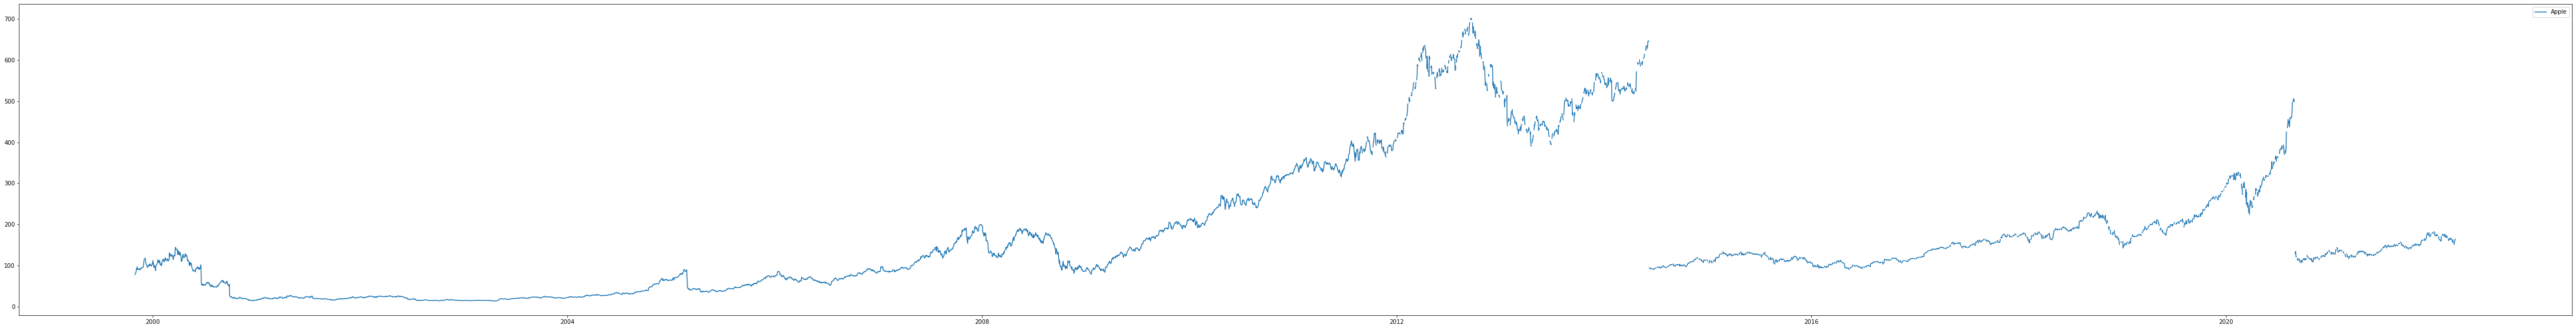

In [191]:
plt.figure(figsize=(80,10))

plt.plot(df_stocks_close['apple'])
plt.legend(['Apple','Bitcoin', 'Tesla', 'Microsoft', 'Google', 'Facebook'])



In [154]:
df_stocks_close_normed_y_woBTC.head()

,apple,tesla,microsoft,google,facebook
timestamp,,,,,
1999-11-01,1.000000,NaN,1.000000,NaN,NaN
1999-11-02,1.033883,NaN,1.002057,NaN,NaN
1999-11-03,1.049987,NaN,0.995994,NaN,NaN
1999-11-04,1.077300,NaN,0.993288,NaN,NaN
1999-11-05,1.137722,NaN,0.991231,NaN,NaN


In [155]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

In [ ]:
# app = Dash('Stockvalues closed, without BTC')

# app.layout = html.Div([
#     html.H4('Stockvalues closed, without BTC'),
#     dcc.Graph(id="graph"),
#     dcc.Checklist(
#         id="checklist",
#         options=[2000,2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
#         value=[2020, 2021],
#         inline=True
#     ),
# ])


# @app.callback(
#     Output("graph", "figure"), 
#     Input("checklist", "value"))
# def update_line_chart(continents):
#     df = px.df_stocks_close_normed_y_woBTC # replace with your own data source
#     mask = df.index.isin(options)
#     fig = px.line(df[mask], 
#         x="year", y="Value")
#     return fig


#app.run_server(debug=True)

In [157]:
df_stocks_close_normed.head()

,apple,bitcoin,tesla,microsoft,google,facebook
timestamp,,,,,,
1999-11-01,1.000000,NaN,NaN,1.000000,NaN,NaN
1999-11-02,1.033883,NaN,NaN,1.002057,NaN,NaN
1999-11-03,1.049987,NaN,NaN,0.995994,NaN,NaN
1999-11-04,1.077300,NaN,NaN,0.993288,NaN,NaN
1999-11-05,1.137722,NaN,NaN,0.991231,NaN,NaN


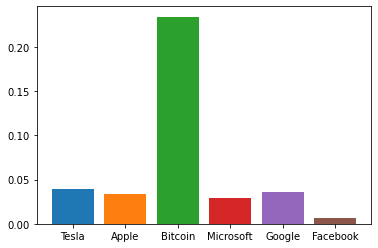

In [158]:
plt.bar('Tesla', df_tesla.avg_ratio[1])
plt.bar('Apple', df_apple.avg_ratio[1])
plt.bar('Bitcoin', df_bitcoin.avg_ratio[1])
plt.bar('Microsoft', df_microsoft.avg_ratio[1])
plt.bar('Google', df_google.avg_ratio[1])
plt.bar('Facebook', df_facebook.avg_ratio[1])
plt.show()

In [159]:
df_bitcoin.head()

,timestamp,open,high,low,close,volume,ratio,absolute,avg_ratio
0,2022-03-21,41265.2659,41548.3907,40506.5318,41006.9671,48166,-0.625947,-258.2988,0.234066
1,2022-03-20,42208.2299,42303.0066,40914.4532,41267.8547,38469,-2.227943,-940.3752,0.234066
2,2022-03-19,41764.4144,42407.3007,41504.8632,42209.0166,39308,1.064548,444.6022,0.234066
3,2022-03-18,40928.0314,42348.2912,40137.4168,41764.1391,52652,2.042873,836.1077,0.234066
4,2022-03-17,41119.5832,41450.5255,40509.1084,40928.8143,53008,-0.463937,-190.7689,0.234066


In [160]:
import plotly.graph_objects as go
from datetime import datetime


In [161]:
# import plotly.io as pio
# pio.renderers.default = 'iframe_connected'

In [162]:

fig = go.Figure(data=[go.Candlestick(x=df_tesla.timestamp,
                open=df_tesla.open,
                high=df_tesla.high,
                low=df_tesla.low,
                close=df_tesla.close)])

#fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [163]:
pf.plot_candlestick(df_tesla)

In [164]:
def revenue(df, start, end, invest):
    if (invest/(df.loc[df.timestamp == start].open)[df[df.timestamp == start].index.values.astype(int)[0]]) <= (df.loc[df.timestamp == start].volume)[df[df.timestamp == start].index.values.astype(int)[0]]:
        profit = (df.loc[df.timestamp == end].close)[df[df.timestamp == end].index.values.astype(int)[0]] - (df.loc[df.timestamp == start].open)[df[df.timestamp == start].index.values.astype(int)[0]]
        profit *= (invest/(df.loc[df.timestamp == start].open)[df[df.timestamp == start].index.values.astype(int)[0]])
        return profit
    else: print('That many Stocks are not available')

In [165]:
def revenue_ratio(df, start, end):
    profit = (df.loc[df.timestamp == end].close)[df[df.timestamp == end].index.values.astype(int)[0]] / (df.loc[df.timestamp == start].open)[df[df.timestamp == start].index.values.astype(int)[0]]
    return profit
    

In [166]:
revenue_ratio(df_tesla, '2015-03-10', '2022-03-11')

4.220258940889313

In [167]:
revenue(df_tesla, '2022-03-10', '2022-03-18', 850)

53.84814140583704

In [168]:
df_tesla.timestamp[2] + 

SyntaxError: invalid syntax (2386798811.py, line 1)

In [ ]:
df_tesla[df_tesla.timestamp == '2022-03-10'].index.values.astype(int)[0]

6

In [ ]:
ab = pd.Interval(left= '2022-03-10', right='2022-03-18')

ValueError: Only numeric, Timestamp and Timedelta endpoints are allowed when constructing an Interval.